# 0. Import neccesary libraries

In [1]:
import os
import shutil
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np

# 1. Visualize the dataset

In [11]:
class MUSDB18Spectrogram:
    """
    Class to compute and visualize spectrograms of audio files.
    
    Args:
        wav_file_path (str): Path to the WAV file.
        
    Attributes:
        wav_file_path (str): Path to the WAV file.
        audio_name (str): Name of the audio file extracted from the path.
        signal (np.ndarray): Audio signal loaded from the WAV file.
        sample_rate (int): Sample rate of the audio signal.
        f (np.ndarray): Frequency bins of the spectrogram.
        t (np.ndarray): Time bins of the spectrogram.
        spectrogram (np.ndarray): Computed spectrogram of the audio signal.
    """
    def __init__(self, spectrogram_path: str):
        """
        Initializes the MUSDB18Spectrogram object.
        """
        spectrogram = torch.load(spectrogram_path)
        self.spectrogram_mix = spectrogram[0,:,:]
        self.spectrogram_voc = spectrogram[1,:,:]
        self.audio_name = spectrogram_path[-7:]
        self.t = torch.arange(self.spectrogram_mix.shape[1])  # Time bins
        self.f = torch.arange(self.spectrogram_mix.shape[0])  # Frequency bins
        self.spectrogram_decibels = 10 * torch.log10(self.spectrogram_mix + 1e-6)  # Applying log scale for better visualization


    def visualize(self):
        """
        Visualize the spectrogram.
        """
        # Plot the spectrogram
        fig, axes = plt.subplots(1, 1, figsize=(15, 10))

        # Plot the regular spectrogram
        im1 = axes.pcolormesh(self.t, self.f, self.spectrogram_decibels, cmap='inferno')  # Applying log scale for better visualization
        axes.set_ylabel('Frequency (Hz)')
        axes.set_xlabel('Time (s)')
        axes.set_title(f'Spectrogram of {self.audio_name}')
        plt.colorbar(im1, ax=axes, label='Intensity (dB)')  # Add colorbar to the subplot
        plt.show()  # Display the plot



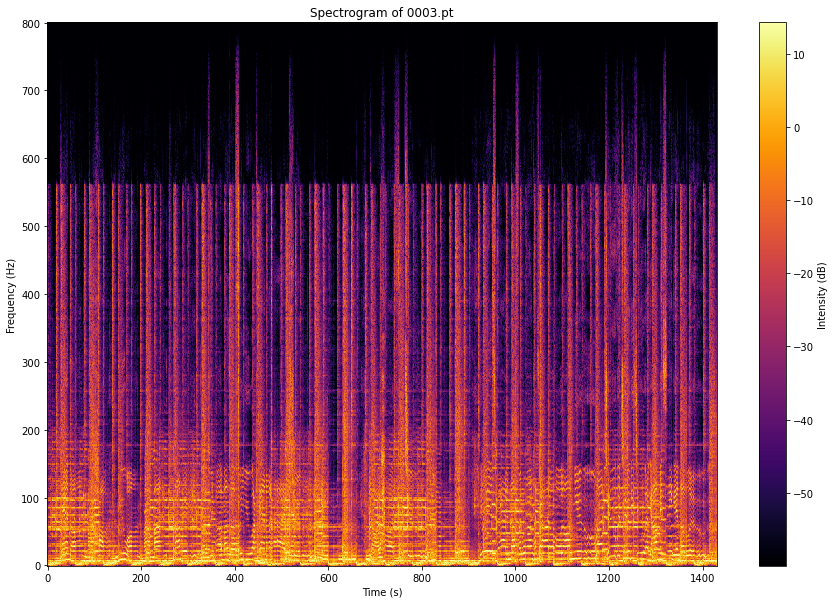

In [13]:

spectrogram_path = './music_data/musdb18hq_processed/train_spectrograms/0003.pt'
my_spectrogram = MUSDB18Spectrogram(spectrogram_path)
my_spectrogram.visualize()

# 2. Loading the data and preprocessing

In [14]:
#  We will create a class that inherits from Dataset

class MUSDB18Dataset(Dataset):

    def __init__(self, path_to_song_library: str):
            pass
        